In [1]:
# https://dev.to/1n0t/matplotlib-heatmap-calendar-3kbo

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf

from datetime import date
from datetime import datetime

import os

import data as data_

In [3]:
folderPath_rsrc = '/Resources/'
folderPath_results = '/Results/'
cwd = os.getcwd()
path_rsrc = cwd + folderPath_rsrc
path_results = cwd + folderPath_results
# read data
ETFs = pd.read_excel(path_rsrc + "ETFs list.xlsx")

In [4]:
ETFs

,Technology,Energy,Telecom,Consumer Discretionary,Real Estate,Industrials,Utilities,Materials,Healthcare,Consumer Staples,Financials
0,AAPB,ACES,FCOM,AMZD,BBRE,AIRR,BLLD,ALUM,AGNG,CHIS,BDCX
1,AAPD,AMJ,IXP,AMZU,BLDG,AQWA,CHIU,BATT,ARKG,CLIX,BDCZ
2,AAPU,AMLP,IYZ,BAD,BYRE,ARKX,ECLN,CHIM,BBC,EATV,BIZD
3,AIQ,AMNA,LTL,BEDZ,CHIR,AWAY,EMIF,CIRC,BBH,EATZ,BNKD
4,ARKK,AMND,NXTG,BETZ,DFGR,BDRY,FUTY,COPX,BBP,ECON,BNKU
...,...,...,...,...,...,...,...,...,...,...,...
163,XPND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,XSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,XSW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,XT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
sector = "Energy"
energy = ETFs[sector]
energy.dropna(inplace=True)

In [6]:
energy = energy.to_list()

In [12]:
end_ = date.today()  # yyyy-mm-dd
if end_.day == 31:
    start_ = datetime(end_.year, end_.month - 1, 30)
else:
    start_ = datetime(end_.year, end_.month - 1, end_.day)

# data = yf.download(energy, start=start_, end=end_, interval="1wk")
data_.downloadAllTickers(tickers=energy, start=start_, end=end_, _filter=None)
# data_.downloadTicker(ticker="XT", start=start_, end=end_)

In [13]:
cwd = os.getcwd()
folderPath_rsrc = '/Resources/'
path_results = cwd + folderPath_rsrc
data = pd.read_pickle(f"{path_results}{energy[0]}")

In [27]:
data.head()

,date,open,high,low,close,adjusted_close,volume
0,2023-10-02,36.39,36.390,34.720,34.95,34.95,26400
1,2023-10-03,34.50,34.500,33.522,33.69,33.69,27900
2,2023-10-04,33.82,34.260,33.255,34.13,34.13,372100
3,2023-10-05,33.75,33.750,32.700,32.76,32.76,54800
4,2023-10-06,32.32,33.645,32.200,33.37,33.37,128600


In [15]:
if end_.day == 31:
    start_ = datetime(end_.year, end_.month - 1, 30)

In [16]:
df = data["adjusted_close"]
df

0     34.95
1     33.69
2     34.13
3     32.76
4     33.37
5     32.99
6     34.94
7     35.08
8     34.08
9     33.72
10    34.21
11    34.58
12    32.89
13    31.67
14    30.58
15    30.41
16    31.01
17    30.44
18    30.45
19    29.51
20    29.29
21    29.53
22    29.34
Name: adjusted_close, dtype: float64

## Calcular retornos

In [17]:
returns = df.pct_change()
returns

0          NaN
1    -0.036052
2     0.013060
3    -0.040141
4     0.018620
5    -0.011387
6     0.059109
7     0.004007
8    -0.028506
9    -0.010563
10    0.014531
11    0.010816
12   -0.048872
13   -0.037093
14   -0.034417
15   -0.005559
16    0.019730
17   -0.018381
18    0.000329
19   -0.030870
20   -0.007455
21    0.008194
22   -0.006434
Name: adjusted_close, dtype: float64

In [18]:
# values = returns.iloc[-1].sort_values(ascending=False)
# val_max = values.max()
# val_min = values.min()
# values
values = returns.sort_values(ascending=False)
val_max = values.max()
val_min = values.min()
values

6     0.059109
16    0.019730
4     0.018620
10    0.014531
2     0.013060
11    0.010816
21    0.008194
7     0.004007
18    0.000329
15   -0.005559
22   -0.006434
20   -0.007455
9    -0.010563
5    -0.011387
17   -0.018381
8    -0.028506
19   -0.030870
14   -0.034417
1    -0.036052
13   -0.037093
3    -0.040141
12   -0.048872
0          NaN
Name: adjusted_close, dtype: float64

In [19]:
returns.iloc[-1]

-0.006434134778191658

In [20]:
values.values

array([ 0.05910882,  0.01973035,  0.01862027,  0.01453144,  0.01306026,
        0.01081555,  0.00819392,  0.00400687,  0.00032852, -0.00555919,
       -0.00643413, -0.0074551 , -0.01056338, -0.01138747, -0.01838117,
       -0.02850627, -0.03087028, -0.03441743, -0.0360515 , -0.03709334,
       -0.04014064, -0.04887218,         nan])

In [21]:
test = [round(i*100,2) for i in values]
test[:10]

[5.91, 1.97, 1.86, 1.45, 1.31, 1.08, 0.82, 0.4, 0.03, -0.56]

In [22]:
length = len(test)
# the idea is to shape an a X b matrix
a = int(np.sqrt(length))
b = int(np.ceil(length/a))
m_length = a * b                # matrix "length"

if m_length >= length:
    # compute how many elements need to be add to the array
    diff = abs(length - m_length)
    
    add =np.full(diff, np.nan)
    new_array = np.append(test, add)
    new_array = new_array.reshape(a, b)
    
    # add names to the plot
    names = values.index.to_list()
    add_names =np.full(diff, '---')
    new_names = np.append(names, add_names)
    new_names = new_names.reshape(a, b)

In [23]:
new_array

array([[ 5.91,  1.97,  1.86,  1.45,  1.31,  1.08],
       [ 0.82,  0.4 ,  0.03, -0.56, -0.64, -0.75],
       [-1.06, -1.14, -1.84, -2.85, -3.09, -3.44],
       [-3.61, -3.71, -4.01, -4.89,   nan,   nan]])

In [24]:
new_names

array([['6', '16', '4', '10', '2', '11'],
       ['21', '7', '18', '15', '22', '20'],
       ['9', '5', '17', '8', '19', '14'],
       ['1', '13', '3', '12', '0', '---']], dtype='<U11')

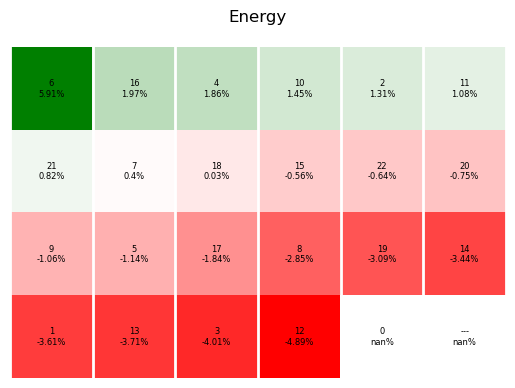

In [25]:
valores = new_array
from  matplotlib.colors import LinearSegmentedColormap
cmap_=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 

# "RdYlGn"
fig, ax = plt.subplots()

# Especificamos paleta de colores a usar y rango de valores a representar.
ax.imshow(valores, cmap=cmap_, vmin=val_min*100, vmax=val_max*100)
# borrar axis labels
ax.set_yticklabels([])
ax.set_xticklabels([])

# Reducimos la longitud de las marcas a 0 para que no sean visibles
ax.tick_params(axis=u'both', which=u'both', length=0)
for lado in ['left', 'right', 'bottom', 'top']:
    ax.spines[lado].set_visible(False)

# # Indicamos las posiciones donde dibujaremos la rejilla  
xmin,xmax = ax.get_xlim()
ymin,ymax = ax.get_ylim()

ax.set_yticks(np.arange(ymax, ymin+1), minor=True)
ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
# Dibujamos la rejilla de color blanco para que actue como separador.
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

for i in range(new_array.shape[0]):
    for j in range(new_array.shape[1]):
        # print(i, j, valores[i,j])
        text = ax.text(j, i, str(new_names[i, j]) + '\n' + str(valores[i, j])+'%',
                       ha="center", va="center", color="k", size=6)

ax.set_title(f"{sector}\n")
        
plt.savefig(f"{sector}.png")
plt.show()
